In [1]:
import torch
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import glob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import cv2
import sys
import random

In [2]:
tumor = []
healthy = []
for f in glob.iglob("./data/Brain_Tumor_Dataset/Positive/*.jpg"):
    img = cv2.imread(f)
    img = cv2.resize(img,(128,128))
    b, g, r = cv2.split(img)
    img = cv2.merge([r,g,b])
    tumor.append(img)

for f in glob.iglob("./data/Brain_Tumor_Dataset/Negative/*.jpg"):
    img = cv2.imread(f)
    img = cv2.resize(img,(128,128)) 
    b, g, r = cv2.split(img)
    img = cv2.merge([r,g,b])
    healthy.append(img)

In [3]:
healthy = np.array(healthy)
tumor = np.array(tumor)
All = np.concatenate((healthy, tumor))

In [4]:
tumor.shape

(3266, 128, 128, 3)

In [5]:
healthy.shape

(2000, 128, 128, 3)

In [6]:
np.random.choice(10, 5, replace=False)

array([9, 3, 6, 4, 8])

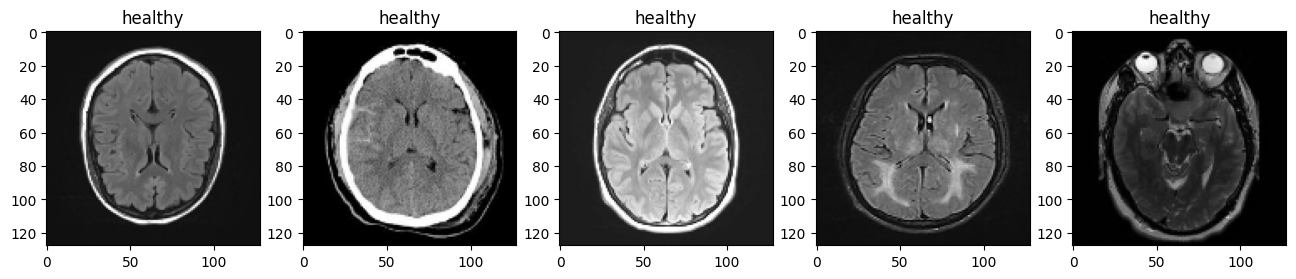

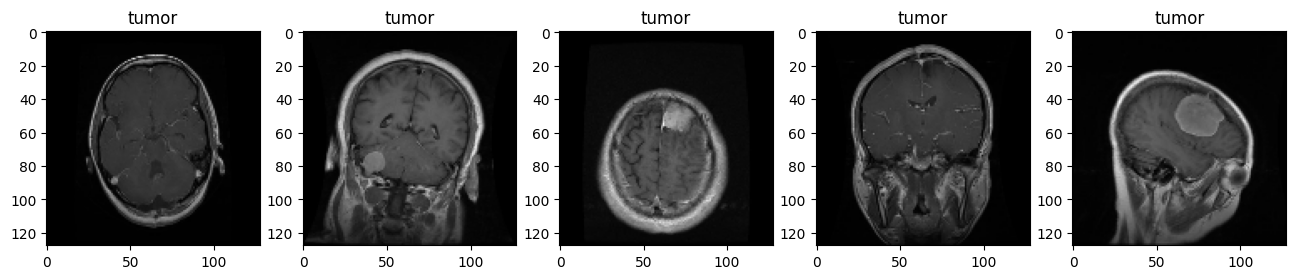

In [7]:
def plot_random(healthy, tumor, num=5):
    healthy_imgs = healthy[np.random.choice(healthy.shape[0], num, replace=False)]
    tumor_imgs = tumor[np.random.choice(tumor.shape[0], num, replace=False)]
    
    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('healthy')
        plt.imshow(healthy_imgs[i])
        
    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('tumor')
        plt.imshow(tumor_imgs[i])

plot_random(healthy, tumor, num=5)

In [8]:
class Dataset(object):

    def __len__(self):
        raise NotImplementedError

    def __getitem__(self, index):
        raise NotImplementedError

    def __add__(self, other):
        return ConcatDataset([self, other])